#Session 4 - Architectural Basics
##After 4 code iterations achieve:
###1. 99.4% accuracy
###2. Less than 15k Parameters
###3. Have started from a Vanilla network (no BN, DropOut, LR, larger batch size,change in Optimizer, etc).

### **Import Libraries and modules**
1. import the basic libraries
2. import libraries required for building up the model using keras
3. import the mnist dataset

In [0]:
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import Activation


from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets
Load data from mnist dataset and split the data between training dataset and testing dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###**Print and Plot**:
1. Print the shape for the trainig dataset
2. Import pyplot for plotting the input image
3. Plot the Input Image

(60000, 28, 28)


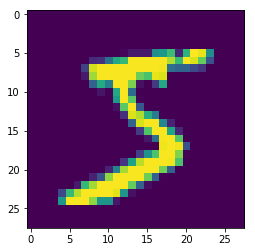

In [13]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

###**Reshape**:
1. Reshape the training dateset to 28*28 size with 1 channel.
2. Reshape the testing dateset to 28*28 size with 1 channel.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

###**Type Conversion and Scalling:**
1. Convert the input data type to float32.
2. Normalise the input data within the range of 0 and 9.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

###**Print Y Train:**
1. Print the y train first 10 values

In [16]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

###**One Hot Encoding of Labels:**
1. Convert the 1D class arrays of output data into 10 dimesional class matrices - basically one hot encoding.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

###**Print Y Train after encoding:**
1. Print the y train first 10 values

In [18]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#**Model Creation Using Keras**
The following code defines the architecture/model of our neural network in which we will add layers in the network using keras:
1.   **Initializing a sequential model**: Stack layers on top of one another, it also ensures that the input and output sizes of successive layers are compatible. 
2.   **Adding Convolution Layers**: While adding the first convolution layer we need to specify the input size as well. In the next convolution layers we do not need an input size since they will receive the input size from the preceeding layers.
3. **Adding Max Pooling Layers**: We add them to resuce the dimensions of image extracting the maximum out of the (2,2) pool and pass them forward.
4. **Adding Flatten Layer**: When finally we reach the output size of 1X1X10, we flatten the output channel-wise into output of shape 10 (1-dimension).
5. **Adding Softmax Layer**: This layer converts the last layer outuput into probabolity distribution of 10 classes.



##Vanilla DNN

**1. Total params: 13,496**

**2. Trainable params: 13,496**

**3. Non-trainable params: 0**

##We are getting the validation accuracy = 99.08%
#### On Epoch 10 the following results:
loss: 0.0195 || acc: 0.9932 || val_loss: 0.0286 || **val_acc: 0.9908** ||





In [19]:
########################################
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [28, 28, 1] | OUTPUT SIZE : [26, 26, 8] | GRF_of_input : [1, 1]
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))

# INPUT SIZE : [26, 26, 8] | OUTPUT SIZE : [24, 24, 16] | GRF_of_input : [3, 3]
model.add(Convolution2D(16, 3, 3, activation='relu'))

# INPUT SIZE : [24, 24, 16] | OUTPUT SIZE : [22, 22, 24] | GRF_of_input : [5, 5]
model.add(Convolution2D(24, 3, 3, activation='relu'))

########################################

# INPUT SIZE : [22, 22, 24] | OUTPUT SIZE : [11, 11, 24] | GRF_of_input : [7, 7]
model.add(MaxPooling2D(pool_size=(2, 2)))

########################################

# INPUT SIZE : [11, 11, 24] | OUTPUT SIZE : [11, 11, 8] | GRF_of_input : [14, 14]
model.add(Convolution2D(8, 1, 1, activation='relu'))

# INPUT SIZE : [11, 11, 8] | OUTPUT SIZE : [9, 9, 16] | GRF_of_input : [14, 14]
model.add(Convolution2D(16, 3, 3, activation='relu'))

# INPUT SIZE : [9, 9, 16] | OUTPUT SIZE : [7, 7, 16] | GRF_of_input : [16, 16]
model.add(Convolution2D(16, 3, 3, activation='relu'))

########################################

# INPUT SIZE : [7, 7, 16] | OUTPUT SIZE : [7, 7, 10] | GRF_of_input : [18, 18]
model.add(Convolution2D(10, 1, 1, activation='relu'))

# INPUT SIZE : [7, 7, 10] | OUTPUT SIZE : [1, 1, 10] | GRF_of_input : [18, 18]
model.add(Convolution2D(10, 7, 7))

########################################
# INPUT SIZE : [1, 1, 10] | OUTPUT SIZE : [10] | GRF_of_input : [31, 31]
model.add(Flatten())

# INPUT SIZE : [10] | OUTPUT SIZE : [10] | GRF_of_input : [31, 31]
model.add(Activation('softmax'))

########################################
# Printing out the model summary
model.summary()

# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model_vanilla.h5')
########################################

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Upda

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 8)         200       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 16)          1168      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 16)          2320      
__________

###**Compiling the Model**

Compiling means that the keras will create the computational graph using tensorflow backend. 

For this to happen, we need to provide:
1. **Loss Function:** It is a mathematical function that calculates some sort of differentiable distance measure between the network's output and the actual output for each class. During training, we average out these losses and backpropagate them through the network. In this case - we use categorical cross-entropy.
2. **Optimizer:** Optimizer algorithm manipulates the learning rate per time-step so as to update the weights in a manner that does not lead to a swinging behaviour around the minimum. A few examples are AdaGrad, Momentum etc. but Adam is what is mostly used by everyone.
3. **Accuracy Metric:** This is a metric that measures the performance of the network. In the case of classification this is accuracy (i.e. number_of_correct_predictions / number_of_total_examples_in_batch).


---


###**Training the Model**

We use model.fit for training the model. We pass the training dataset, batch size and number of epochs as parameter to the function.


---



In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.load_weights('model_vanilla.h5')
model.fit(X_train, Y_train, batch_size=32, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 22s 372us/step - loss: 0.2280 - acc: 0.9295 - val_loss: 0.0771 - val_acc: 0.9765
Epoch 2/30
60000/60000 [==============================] - 22s 370us/step - loss: 0.0759 - acc: 0.9773 - val_loss: 0.0536 - val_acc: 0.9832
Epoch 3/30
60000/60000 [==============================] - 22s 366us/step - loss: 0.0539 - acc: 0.9836 - val_loss: 0.0422 - val_acc: 0.9859
Epoch 4/30
60000/60000 [==============================] - 22s 363us/step - loss: 0.0446 - acc: 0.9864 - val_loss: 0.0373 - val_acc: 0.9882
Epoch 5/30
60000/60000 [==============================] - 22s 369us/step - loss: 0.0365 - acc: 0.9888 - val_loss: 0.0351 - val_acc: 0.9875
Epoch 6/30
60000/60000 [==============================] - 22s 362us/step - loss: 0.0318 - acc: 0.9900 - val_loss: 0.0374 - val_acc: 0.9875
Epoch 7/30
60000/60000 [==============================] - 23s 389us/step - loss: 0.0285 - acc: 0.9912 - val_loss: 0.

## DNN - Adding Batch Normalization and Dropout


---


###Batch Normalization
> It is used to normalize the input layer by adjusting and scaling the activations. For example, when we have features from 0 to 1 and some from 1 to 1000, we should normalize them to speed up learning. 

> Batch normalization is a method we can use to normalize the inputs of each layer, in order to fight the **internal covariate shift** problem.
Batch normalization allows each layer of a network to learn by itself a little bit more independently of other layers.

> **Internal covariate shift** -  Each layer must learn to adapt themselves to a new distribution in every training step which slows down the training process.

**Steps for BN:**
1. Calculate the mean and variance of the layers input.
2. Normalize the layer inputs using the previously calculated batch statistics.
3. Scale and shift in order to obtain the output of the layer.
**P.S - γ and β are learned during training along with the original parameters of the network.**


---


###Dropout
> The term “Dropout” refers to dropping out units (both hidden and visible) in a neural network. Dropout ignores units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

> Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.During training, some number of layer outputs are randomly ignored or “dropped out.”
####Why do we need Dropout?

> To prevent over-fitting


---

### Validation Accuracy = 99.42%


---



In [21]:
########################################
model = Sequential()
########################################

# All shapes are in the form [height, width, num_channels]

# INPUT SIZE : [28, 28, 1] | OUTPUT SIZE : [26, 26, 8] | GRF_of_input : [1, 1]
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

# INPUT SIZE : [26, 26, 8] | OUTPUT SIZE : [24, 24, 16] | GRF_of_input : [3, 3]
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())

# INPUT SIZE : [24, 24, 16] | OUTPUT SIZE : [22, 22, 24] | GRF_of_input : [5, 5]
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(BatchNormalization())

########################################
# 0.15% of the input units are set to 0 randomly
model.add(Dropout(0.15))
########################################

# INPUT SIZE : [22, 22, 24] | OUTPUT SIZE : [11, 11, 24] | GRF_of_input : [7, 7]
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
########################################

# INPUT SIZE : [11, 11, 24] | OUTPUT SIZE : [11, 11, 8] | GRF_of_input : [14, 14]
model.add(Convolution2D(8, 1, 1, activation='relu'))
model.add(BatchNormalization())

# INPUT SIZE : [11, 11, 8] | OUTPUT SIZE : [9, 9, 16] | GRF_of_input : [14, 14]
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())

# INPUT SIZE : [9, 9, 16] | OUTPUT SIZE : [7, 7, 16] | GRF_of_input : [16, 16]
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())

########################################
# 0.15% of the input units are set to 0 randomly
model.add(Dropout(0.15))
########################################

# INPUT SIZE : [7, 7, 16] | OUTPUT SIZE : [7, 7, 10] | GRF_of_input : [18, 18]
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())

# INPUT SIZE : [7, 7, 10] | OUTPUT SIZE : [1, 1, 10] | GRF_of_input : [18, 18]
model.add(Convolution2D(10, 7, 7))
model.add(BatchNormalization())

########################################
# INPUT SIZE : [1, 1, 10] | OUTPUT SIZE : [10] | GRF_of_input : [31, 31]
model.add(Flatten())

# INPUT SIZE : [10] | OUTPUT SIZE : [10] | GRF_of_input : [31, 31]
model.add(Activation('softmax'))
########################################
# Printing out the model summary
model.summary()

# saving the model to reload model with initial weights while trying out different optimizations
model.save_weights('model_BN_AND_DROPOUT.h5')
########################################

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0816 09:52:50.929826 139672295782272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
W0816 09:52:51.238708 139672295782272 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorfl

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 24)        96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 24)        0         
__________

### Validation Accuracy = 99.42%
1. Total params: 14,024
2. Trainable params: 13,760
3. Non-trainable params: 264

### Epoch 17 - loss: 0.0291 || acc: 0.9916 || val_loss: 0.0233 || val_acc: 0.9942

---

 ## Comparison With Vanilla DNN
 1. With Vanilla DNN, we were getting **99.08% validation accuracy** and after adding Batch Normalisation and Dropout we get **99.42% validation accuracy**.
 2. We used Batch Normalisation after every single layer to normalise the input image.
 3. We used 2 Dropout Layers with **0.15 rate** in our network for randomly setting input units to 0 at each update during training time, which helps prevent overfitting.




In [22]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.load_weights('model_BN_AND_DROPOUT.h5')
model.fit(X_train, Y_train, batch_size=32, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 43s 710us/step - loss: 0.4145 - acc: 0.9235 - val_loss: 0.0990 - val_acc: 0.9841
Epoch 2/30
60000/60000 [==============================] - 41s 678us/step - loss: 0.1557 - acc: 0.9684 - val_loss: 0.0577 - val_acc: 0.9883
Epoch 3/30
60000/60000 [==============================] - 43s 711us/step - loss: 0.1061 - acc: 0.9763 - val_loss: 0.0464 - val_acc: 0.9899
Epoch 4/30
60000/60000 [==============================] - 42s 705us/step - loss: 0.0836 - acc: 0.9807 - val_loss: 0.0436 - val_acc: 0.9897
Epoch 5/30
60000/60000 [==============================] - 42s 693us/step - loss: 0.0696 - acc: 0.9835 - val_loss: 0.0312 - val_acc: 0.9927
Epoch 6/30
60000/60000 [==============================] - 42s 702us/step - loss: 0.0626 - acc: 0.9845 - val_loss: 0.0373 - val_acc: 0.9897
Epoch 7/30
60000/60000 [==============================] - 42s 704us/step - loss: 0.0549 - acc: 0.9859 - val_loss: 0.

## Improving the Batch Size
###Batch Size
The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. A training dataset can be divided into one or more batches. 
> There are 3 types of samples distribution based on different batch size:
* **Batch Gradient Descent**: Batch Size = Size of Training Set
* **Stochastic Gradient Descent**: Batch Size = 1
* **Mini-Batch Gradient Descent**: == 1 < Batch Size < Size of Training Set

> **Small Batch Size** - They are noisy, offering a regularizing effect and lower generalization error. It is easier to fit one batch worth of training data in memory (i.e. when using a GPU).

> **Large Batch Size** - To allow larger learning rate and faster convergence and there are less number of batches so the training is faster.
It has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize.

---

In the following 3 cells we have tried out our latest DNN with **diffent batch sizes**:
###1. Batch Size = 50, Validation Accuracy = 99.39%
**Epoch 17/30 -**
|| loss: 0.0268 || acc: 0.9923 || val_loss: 0.0199 || **val_acc: 0.9939**

###2. Batch Size = 75, Validation Accuracy = 99.38%
**Epoch 12/30 -**
|| loss: 0.0314 || acc: 0.9917 || val_loss: 0.0223 || **val_acc: 0.9938**

###3. Batch Size = 100, Validation Accuracy = 99.41%
**Epoch 26/30 -**
|| loss: 0.0160 || acc: 0.9954 || val_loss: 0.0194 || **val_acc: 0.9941**



### Batch Size = 50

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.load_weights('model_BN_AND_DROPOUT.h5')
model.fit(X_train, Y_train, batch_size=50, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 30s 501us/step - loss: 0.4474 - acc: 0.9211 - val_loss: 0.1484 - val_acc: 0.9799
Epoch 2/30
60000/60000 [==============================] - 28s 474us/step - loss: 0.1531 - acc: 0.9738 - val_loss: 0.0713 - val_acc: 0.9874
Epoch 3/30
60000/60000 [==============================] - 28s 471us/step - loss: 0.1011 - acc: 0.9801 - val_loss: 0.0604 - val_acc: 0.9857
Epoch 4/30
60000/60000 [==============================] - 30s 494us/step - loss: 0.0779 - acc: 0.9829 - val_loss: 0.0448 - val_acc: 0.9902
Epoch 5/30
60000/60000 [==============================] - 29s 480us/step - loss: 0.0649 - acc: 0.9847 - val_loss: 0.0408 - val_acc: 0.9885
Epoch 6/30
60000/60000 [==============================] - 30s 492us/step - loss: 0.0567 - acc: 0.9857 - val_loss: 0.0392 - val_acc: 0.9890
Epoch 7/30
60000/60000 [==============================] - 29s 489us/step - loss: 0.0517 - acc: 0.9869 - val_loss: 0.

### Batch Size = 75

In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.load_weights('model_BN_AND_DROPOUT.h5')
model.fit(X_train, Y_train, batch_size=75, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 22s 371us/step - loss: 0.4891 - acc: 0.9177 - val_loss: 0.1847 - val_acc: 0.9813
Epoch 2/30
60000/60000 [==============================] - 20s 334us/step - loss: 0.1646 - acc: 0.9783 - val_loss: 0.0867 - val_acc: 0.9877
Epoch 3/30
60000/60000 [==============================] - 19s 322us/step - loss: 0.1038 - acc: 0.9839 - val_loss: 0.0781 - val_acc: 0.9852
Epoch 4/30
60000/60000 [==============================] - 19s 321us/step - loss: 0.0782 - acc: 0.9853 - val_loss: 0.0520 - val_acc: 0.9901
Epoch 5/30
60000/60000 [==============================] - 19s 322us/step - loss: 0.0629 - acc: 0.9876 - val_loss: 0.0435 - val_acc: 0.9894
Epoch 6/30
60000/60000 [==============================] - 19s 324us/step - loss: 0.0551 - acc: 0.9877 - val_loss: 0.0346 - val_acc: 0.9917
Epoch 7/30
60000/60000 [==============================] - 20s 329us/step - loss: 0.0486 - acc: 0.9888 - val_loss: 0.

### Batch Size = 100

In [32]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.load_weights('model_BN_AND_DROPOUT.h5')
model.fit(X_train, Y_train, batch_size=100, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 20s 327us/step - loss: 0.5167 - acc: 0.9165 - val_loss: 0.2181 - val_acc: 0.9803
Epoch 2/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.1869 - acc: 0.9781 - val_loss: 0.1063 - val_acc: 0.9874
Epoch 3/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.1187 - acc: 0.9834 - val_loss: 0.0720 - val_acc: 0.9894
Epoch 4/30
60000/60000 [==============================] - 16s 262us/step - loss: 0.0885 - acc: 0.9859 - val_loss: 0.0533 - val_acc: 0.9907
Epoch 5/30
60000/60000 [==============================] - 16s 261us/step - loss: 0.0694 - acc: 0.9875 - val_loss: 0.0504 - val_acc: 0.9908
Epoch 6/30
60000/60000 [==============================] - 16s 272us/step - loss: 0.0594 - acc: 0.9886 - val_loss: 0.0401 - val_acc: 0.9911
Epoch 7/30
60000/60000 [==============================] - 17s 276us/step - loss: 0.0516 - acc: 0.9889 - val_loss: 0.

##Improving the Learning Rate

###Learning Rate
The amount of change to the model during each step of this search process, or the step size, is called the “learning rate”. 

Learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0.

During training, the backpropagation of error estimates the amount of error for which the weights of a node in the network are responsible. Instead of updating the weight with the full amount, it is scaled by the learning rate.

Learning rate controls how quickly or slowly a neural network model learns a problem.

**Large learning rate** allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights.

**Small learning rate** may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train.

---


In the following cells we have tried out our latest DNN with **Learning Rate**:
###1. Learning Rate = 0.01, Optimizer = Adam, Batch Size = 100, Validation Accuracy = 99.38%
**Epoch 27/30 -**
|| loss: 0.0146 || acc: 0.9951 || val_loss: 0.0212 || **val_acc: 0.9938**

###2. Learning Rate = 0.005, Optimizer = Adam, Batch Size = 100, Validation Accuracy = 99.41%
**Epoch 30/30 -**
|| loss: 0.0124 || acc: 0.9959 || val_loss: 0.0224 || **val_acc: 0.9941**

###3. Learning Rate = 0.001, Optimizer = Adam, Batch Size = 32, Validation Accuracy = 99.38%
**Epoch 30/30 -**
|| loss: 0.0208 || acc: 0.9939 || val_loss: 0.0215 || **val_acc: 0.9938**

---



### Initial LR = 0.01

In [35]:
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

model.load_weights('model_BN_AND_DROPOUT.h5')
model.fit(X_train, Y_train, batch_size=32, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 48s 802us/step - loss: 0.2001 - acc: 0.9501 - val_loss: 0.0855 - val_acc: 0.9737
Epoch 2/30
60000/60000 [==============================] - 45s 743us/step - loss: 0.0865 - acc: 0.9757 - val_loss: 0.0485 - val_acc: 0.9838
Epoch 3/30
60000/60000 [==============================] - 44s 738us/step - loss: 0.0697 - acc: 0.9796 - val_loss: 0.0502 - val_acc: 0.9839
Epoch 4/30
60000/60000 [==============================] - 44s 739us/step - loss: 0.0594 - acc: 0.9828 - val_loss: 0.0307 - val_acc: 0.9898
Epoch 5/30
60000/60000 [==============================] - 44s 740us/step - loss: 0.0538 - acc: 0.9845 - val_loss: 0.0392 - val_acc: 0.9875
Epoch 6/30
60000/60000 [==============================] - 44s 740us/step - loss: 0.0471 - acc: 0.9852 - val_loss: 0.0288 - val_acc: 0.9909
Epoch 7/30
60000/60000 [==============================] - 44s 730us/step - loss: 0.0442 - acc: 0.9870 - val_loss: 0.

In [36]:
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

model.load_weights('model_BN_AND_DROPOUT.h5')
model.fit(X_train, Y_train, batch_size=100, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 22s 367us/step - loss: 0.1922 - acc: 0.9616 - val_loss: 2.1665 - val_acc: 0.1070
Epoch 2/30
60000/60000 [==============================] - 17s 285us/step - loss: 0.0657 - acc: 0.9821 - val_loss: 0.0488 - val_acc: 0.9857
Epoch 3/30
60000/60000 [==============================] - 21s 342us/step - loss: 0.0535 - acc: 0.9845 - val_loss: 0.0448 - val_acc: 0.9858
Epoch 4/30
60000/60000 [==============================] - 18s 308us/step - loss: 0.0457 - acc: 0.9867 - val_loss: 0.0403 - val_acc: 0.9879
Epoch 5/30
60000/60000 [==============================] - 17s 289us/step - loss: 0.0431 - acc: 0.9870 - val_loss: 0.0307 - val_acc: 0.9907
Epoch 6/30
60000/60000 [==============================] - 17s 291us/step - loss: 0.0384 - acc: 0.9886 - val_loss: 0.0259 - val_acc: 0.9931
Epoch 7/30
60000/60000 [==============================] - 18s 295us/step - loss: 0.0347 - acc: 0.9894 - val_loss: 0.

### Initial LR = 0.005

In [27]:
adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

model.load_weights('model_BN_AND_DROPOUT.h5')
model.fit(X_train, Y_train, batch_size=32, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 48s 801us/step - loss: 0.2220 - acc: 0.9502 - val_loss: 0.0763 - val_acc: 0.9781
Epoch 2/30
60000/60000 [==============================] - 43s 710us/step - loss: 0.0938 - acc: 0.9749 - val_loss: 0.0483 - val_acc: 0.9860
Epoch 3/30
60000/60000 [==============================] - 43s 714us/step - loss: 0.0690 - acc: 0.9810 - val_loss: 0.0589 - val_acc: 0.9831
Epoch 4/30
60000/60000 [==============================] - 42s 698us/step - loss: 0.0591 - acc: 0.9832 - val_loss: 0.0402 - val_acc: 0.9881
Epoch 5/30
60000/60000 [==============================] - 43s 714us/step - loss: 0.0521 - acc: 0.9852 - val_loss: 0.0442 - val_acc: 0.9867
Epoch 6/30
60000/60000 [==============================] - 43s 711us/step - loss: 0.0462 - acc: 0.9867 - val_loss: 0.0343 - val_acc: 0.9901
Epoch 7/30
60000/60000 [==============================] - 42s 706us/step - loss: 0.0430 - acc: 0.9878 - val_loss: 0.

In [34]:
adam = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

model.load_weights('model_BN_AND_DROPOUT.h5')
model.fit(X_train, Y_train, batch_size=100, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 22s 364us/step - loss: 0.2526 - acc: 0.9556 - val_loss: 0.0663 - val_acc: 0.9845
Epoch 2/30
60000/60000 [==============================] - 17s 286us/step - loss: 0.0729 - acc: 0.9835 - val_loss: 0.0379 - val_acc: 0.9899
Epoch 3/30
60000/60000 [==============================] - 17s 287us/step - loss: 0.0547 - acc: 0.9864 - val_loss: 0.0456 - val_acc: 0.9864
Epoch 4/30
60000/60000 [==============================] - 17s 289us/step - loss: 0.0478 - acc: 0.9872 - val_loss: 0.0384 - val_acc: 0.9884
Epoch 5/30
60000/60000 [==============================] - 17s 285us/step - loss: 0.0411 - acc: 0.9888 - val_loss: 0.0443 - val_acc: 0.9871
Epoch 6/30
60000/60000 [==============================] - 17s 287us/step - loss: 0.0373 - acc: 0.9891 - val_loss: 0.0303 - val_acc: 0.9917
Epoch 7/30
60000/60000 [==============================] - 17s 286us/step - loss: 0.0347 - acc: 0.9899 - val_loss: 0.

### Initial LR = 0.001

In [31]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

model.load_weights('model_BN_AND_DROPOUT.h5')
model.fit(X_train, Y_train, batch_size=32, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 45s 758us/step - loss: 0.4239 - acc: 0.9208 - val_loss: 0.1293 - val_acc: 0.9805
Epoch 2/30
60000/60000 [==============================] - 42s 702us/step - loss: 0.1587 - acc: 0.9681 - val_loss: 0.0629 - val_acc: 0.9886
Epoch 3/30
60000/60000 [==============================] - 42s 694us/step - loss: 0.1084 - acc: 0.9764 - val_loss: 0.0489 - val_acc: 0.9910
Epoch 4/30
60000/60000 [==============================] - 42s 698us/step - loss: 0.0815 - acc: 0.9805 - val_loss: 0.0387 - val_acc: 0.9905
Epoch 5/30
60000/60000 [==============================] - 42s 697us/step - loss: 0.0707 - acc: 0.9826 - val_loss: 0.0388 - val_acc: 0.9903
Epoch 6/30
60000/60000 [==============================] - 42s 698us/step - loss: 0.0610 - acc: 0.9846 - val_loss: 0.0427 - val_acc: 0.9887
Epoch 7/30
60000/60000 [==============================] - 42s 703us/step - loss: 0.0540 - acc: 0.9866 - val_loss: 0.

In [33]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

model.load_weights('model_BN_AND_DROPOUT.h5')
model.fit(X_train, Y_train, batch_size=100, 
          epochs=30, verbose=1, 
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 21s 357us/step - loss: 0.5233 - acc: 0.9133 - val_loss: 0.2051 - val_acc: 0.9784
Epoch 2/30
60000/60000 [==============================] - 17s 280us/step - loss: 0.1880 - acc: 0.9774 - val_loss: 0.1199 - val_acc: 0.9860
Epoch 3/30
60000/60000 [==============================] - 17s 280us/step - loss: 0.1185 - acc: 0.9831 - val_loss: 0.1083 - val_acc: 0.9839
Epoch 4/30
60000/60000 [==============================] - 17s 281us/step - loss: 0.0872 - acc: 0.9855 - val_loss: 0.0711 - val_acc: 0.9878
Epoch 5/30
60000/60000 [==============================] - 17s 276us/step - loss: 0.0695 - acc: 0.9877 - val_loss: 0.0506 - val_acc: 0.9903
Epoch 6/30
60000/60000 [==============================] - 16s 273us/step - loss: 0.0588 - acc: 0.9882 - val_loss: 0.0477 - val_acc: 0.9896
Epoch 7/30
60000/60000 [==============================] - 16s 273us/step - loss: 0.0501 - acc: 0.9896 - val_loss: 0.

## Best Validation Accuracy Achieved: 99.42%

###With Following Parameters:
1. Batch Normalisation
2. Dropout = 0.15
3. Optimizer = Adam [Default Learning Rate lr=0.001]
4. Batch Size=32
5. Epoch = 17
6. **Total params**: 14,024, 
7. **Trainable params**: 13,760, **Non-trainable params**: 264
8. Validation loss: 2.33%